In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import scipy.stats


In [228]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C2AA-54D0

 Directory of C:\Users\sidha\Desktop\bayesian_project

04/17/2020  04:32 PM    <DIR>          .
04/17/2020  04:32 PM    <DIR>          ..
04/17/2020  04:16 PM    <DIR>          .ipynb_checkpoints
04/16/2020  08:41 PM         1,031,138 2020-03-23-Triangle-Mastercard.pdf
04/17/2020  04:27 PM           146,523 algo_MH_MCMC.jpeg
04/08/2020  11:14 AM    <DIR>          bayesian_linear_regression_project
04/16/2020  05:13 PM               539 EISN_current.csv
04/17/2020  04:27 PM           138,918 likelihood_log_how_why.jpeg
04/15/2020  09:18 PM           266,881 LinearRegression_example.ipynb
04/17/2020  04:23 PM            13,119 MCMC_auto_generated data.ipynb
04/16/2020  06:34 PM           336,337 MCMC_sleep_awake.ipynb
04/17/2020  04:32 PM           815,397 MCMC_sunspot_count.ipynb
04/07/2020  01:38 PM                54 README.md
04/09/2020  10:57 AM             1,170 sleep_awake.csv
04/09/2020  01:24 PM           151,736 s

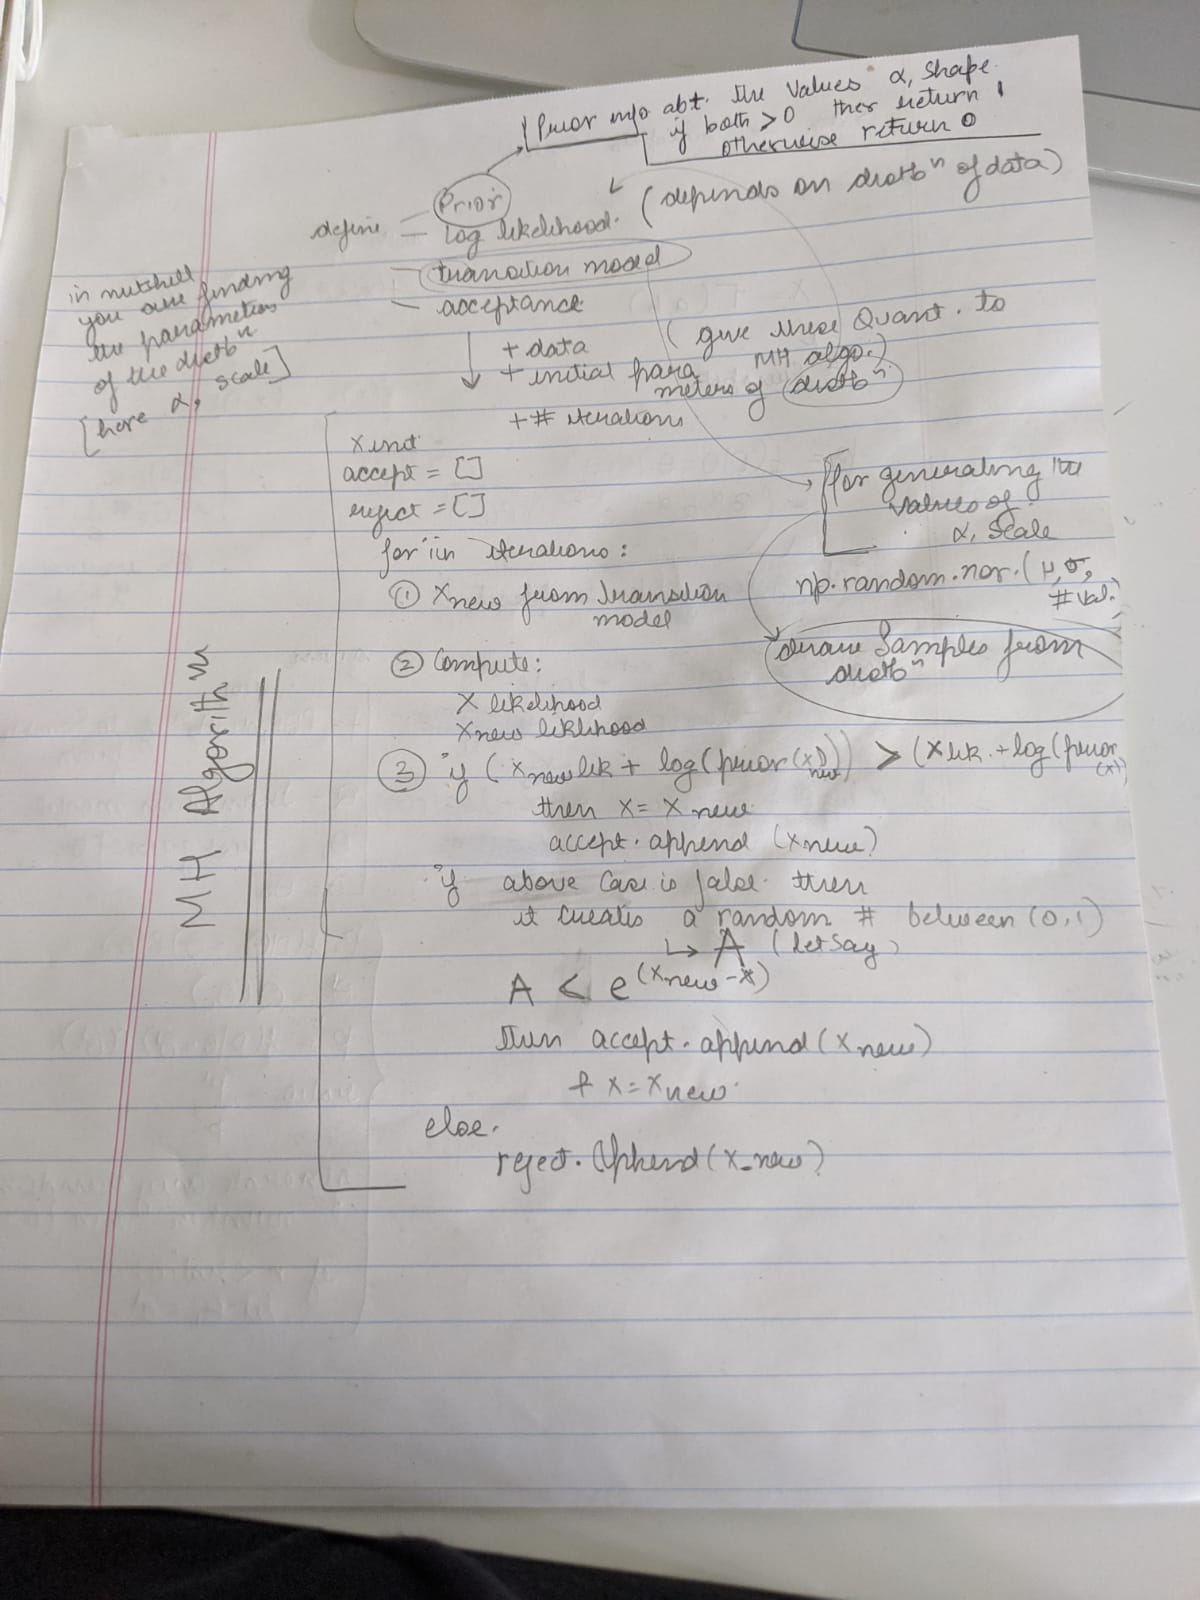

In [231]:
from IPython.display import Image
Image(filename='algo_MH_MCMC.jpeg')


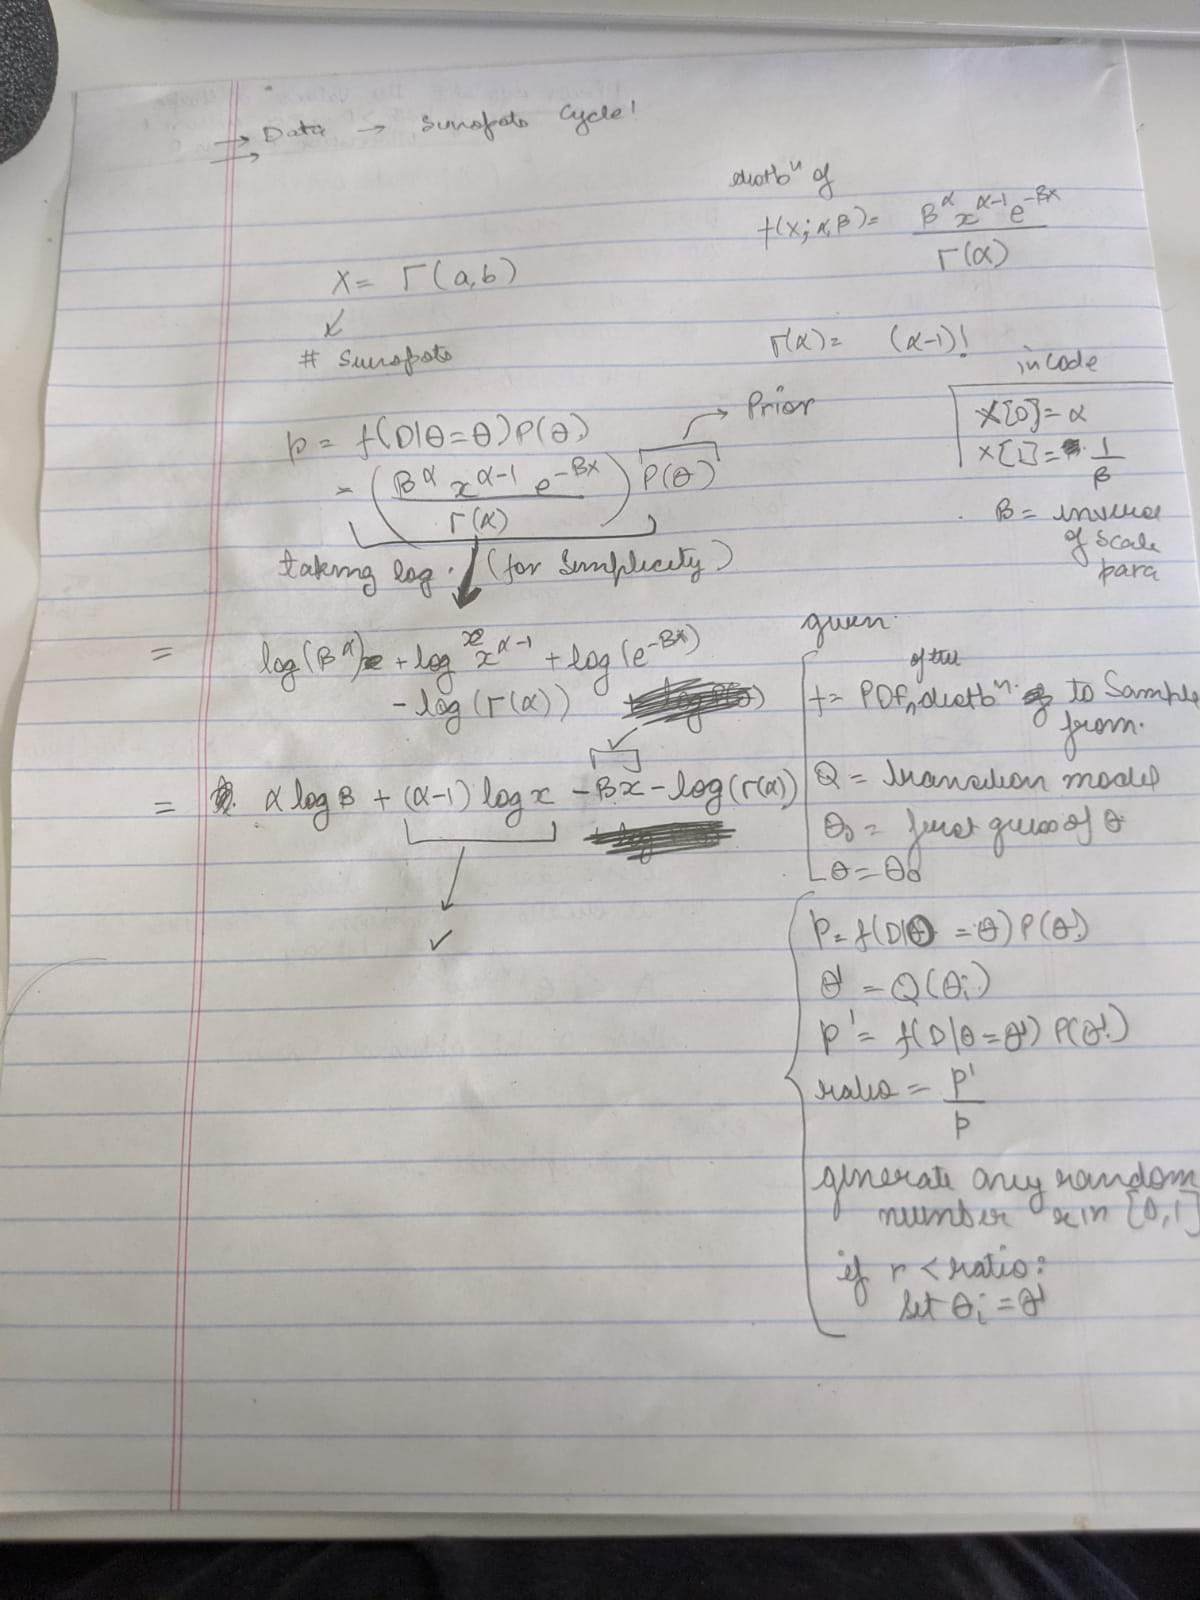

In [232]:
Image(filename='likelihood_log_how_why.jpeg')

In [2]:
#Form a population of 30,000 individual, with average=10 and scale=3
population = mod1(30000)

#Assume we are only able to observe 1,000 of these individuals.
observation = population[np.random.randint(0, 30000, 1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation,bins=35)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title(" Distribution of 1000 observations sampled from a population of 30,000 with mu=10, sigma=3")
mu_obs=observation.mean()
mu_obs

NameError: name 'mod1' is not defined

In [100]:
print(len(observation))
print(len(population))

1000
30000


In [101]:
print(np.random.normal(0.1, 0.5, (1,)))
print(np.random.normal(0.1, 0.5, 1))

[-0.56466064]
[-0.52434416]


In [102]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,1)]

def prior(x):
    if(x[1] <=0):
        return 0
    return 1

In [103]:
#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))

#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))

In [104]:
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    
    x = param_init
    accepted = []
    rejected = [] 
    
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [82]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)

In [83]:
to_show=-accepted.shape[0]
print(rejected.shape)

(41704, 2)


Text(0, 0.5, '$\\sigma$')

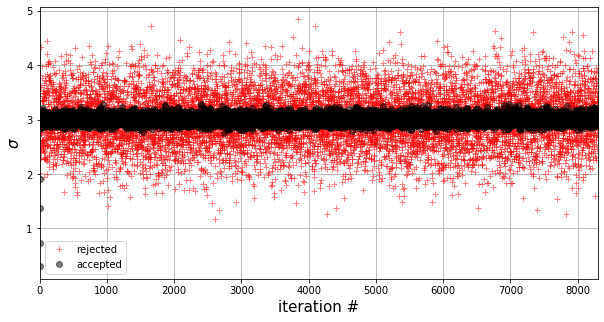

In [84]:
plt.figure(figsize=(10,5))
plt.plot(rejected[to_show:,1], 'r+', label = 'rejected', alpha=0.5)
plt.plot(accepted[to_show:,1], 'ko', label = 'accepted', alpha = 0.5)
plt.legend()
plt.grid()
plt.xlim([-0.5,-to_show])
plt.xlabel("iteration #", size=15)
plt.ylabel("$\sigma$", size=15)

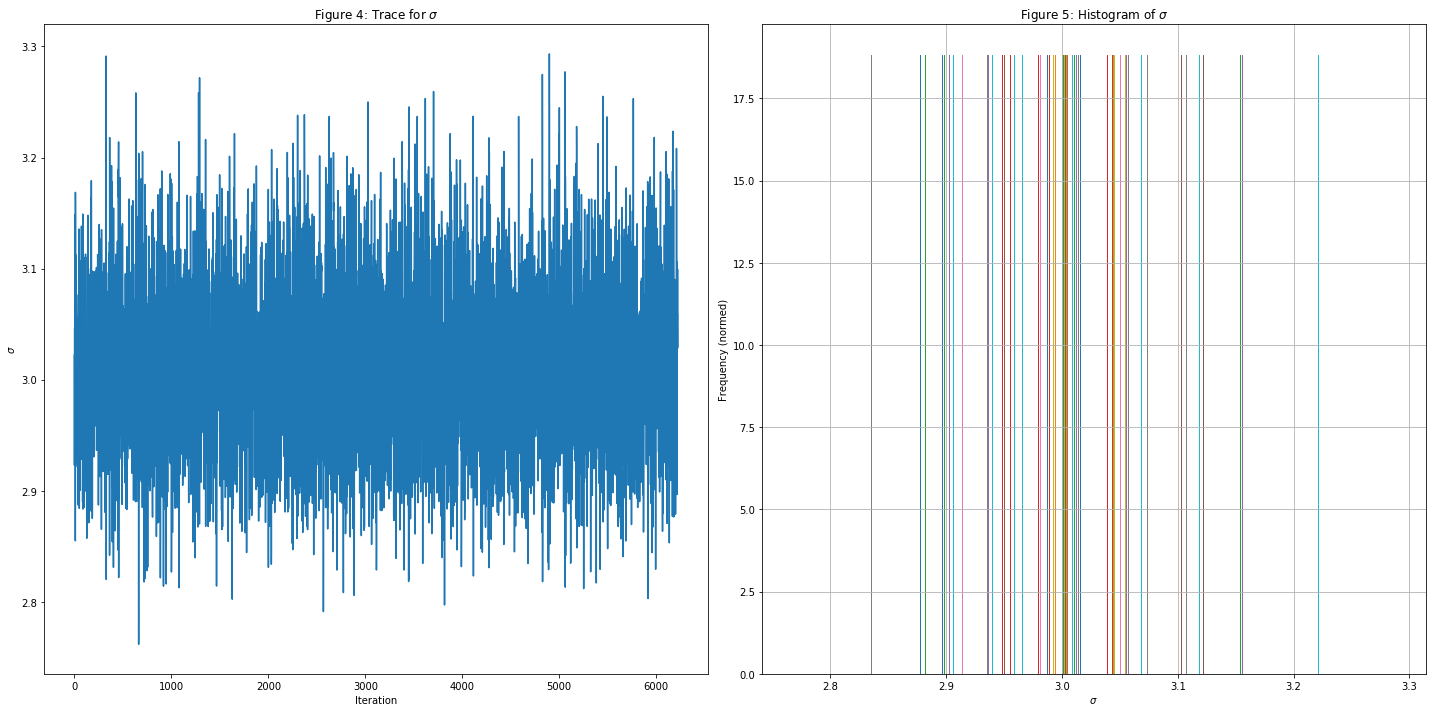

In [92]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=10,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")
fig.tight_layout()


ax.grid("off")

In [ ]:
# we are rejecting first 25% of the values of sigma
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(population.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist( population,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Posterior distribution of predicitons")
ax.legend()

In [122]:
sunspots = np.loadtxt("SN_m_tot_V2.0.csv", delimiter=';')

In [126]:
#sunspots = pd.read_csv('SN_ms_tot_V2.0.csv', delimiter=';')
sunspots.shape

(3255, 7)

(3255,) (3255,)
1785.042


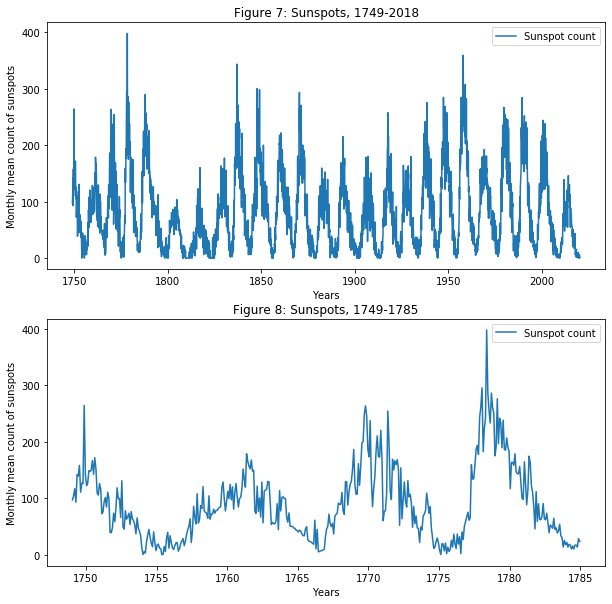

In [181]:
#years is the third column
years = sunspots[:,2]
#activity is the 4th column

# jsut to avoid 0 values in data
activity = sunspots[:,3] + 0.1
print(years.shape,activity.shape)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 7: Sunspots, 1749-2018")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 8: Sunspots, 1749-1785")
ax.legend()

In [180]:
np.where(activity == 0)

(array([  60,   76,   77,  313,  592,  593,  594,  607,  608,  615,  707,
         708,  710,  729,  730,  731,  732,  733,  734,  735,  736,  737,
         738,  739,  740,  741,  742,  743,  744,  745,  746,  747,  748,
         749,  751,  759,  768,  876,  884,  886,  887,  888,  889,  891,
         892,  893,  895,  896,  897,  898,  902,  905,  906,  910, 1280,
        1288, 1416, 1555, 1562, 1827, 1835, 1837, 1839, 1957, 1972, 1973,
        3127], dtype=int64),)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

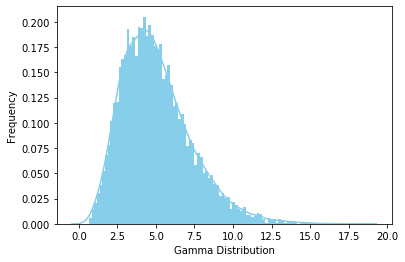

In [175]:
# seing which distribution suits best
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### We can use Gamma disttribution for this with new cycle resetting every 12 years

(array([1.20665884e-02, 9.41255620e-03, 7.00541068e-03, 6.11044632e-03,
        5.86355960e-03, 5.49322952e-03, 4.90687356e-03, 6.07958548e-03,
        4.72170852e-03, 4.72170852e-03, 4.07363088e-03, 3.73416164e-03,
        3.79588332e-03, 2.56144972e-03, 2.46886720e-03, 2.68489308e-03,
        2.12939796e-03, 2.09853712e-03, 1.91337208e-03, 1.57390284e-03,
        1.17271192e-03, 9.25825200e-04, 1.08012940e-03, 1.11099024e-03,
        7.71521000e-04, 3.70330080e-04, 6.17216800e-04, 2.46886720e-04,
        3.08608400e-04, 1.85165040e-04, 6.17216800e-05, 3.08608400e-05,
        0.00000000e+00, 3.08608400e-05, 6.17216800e-05, 0.00000000e+00,
        3.08608400e-05, 0.00000000e+00, 0.00000000e+00, 3.08608400e-05]),
 array([  0.   ,   9.955,  19.91 ,  29.865,  39.82 ,  49.775,  59.73 ,
         69.685,  79.64 ,  89.595,  99.55 , 109.505, 119.46 , 129.415,
        139.37 , 149.325, 159.28 , 169.235, 179.19 , 189.145, 199.1  ,
        209.055, 219.01 , 228.965, 238.92 , 248.875, 258.83 , 268

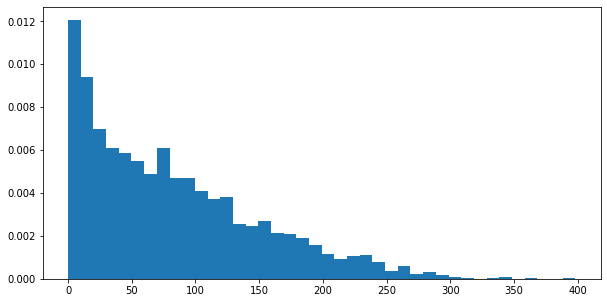

In [176]:
# we can see why we are using this distribution here:
fig = plt.figure(figsize = (10,5))
ax =fig.add_subplot(1,1,1)
ax.hist(activity,bins=40, density=True)

In [193]:
transition_model = lambda x: np.random.normal(x,[0.05,5],2)

def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))


In [183]:

accepted, rejected = metropolis_hastings(manual_log_likelihood_gamma,prior,transition_model,[4, 10], 50000,activity,acceptance)


8494

In [198]:
accepted.shape

(8494, 2)

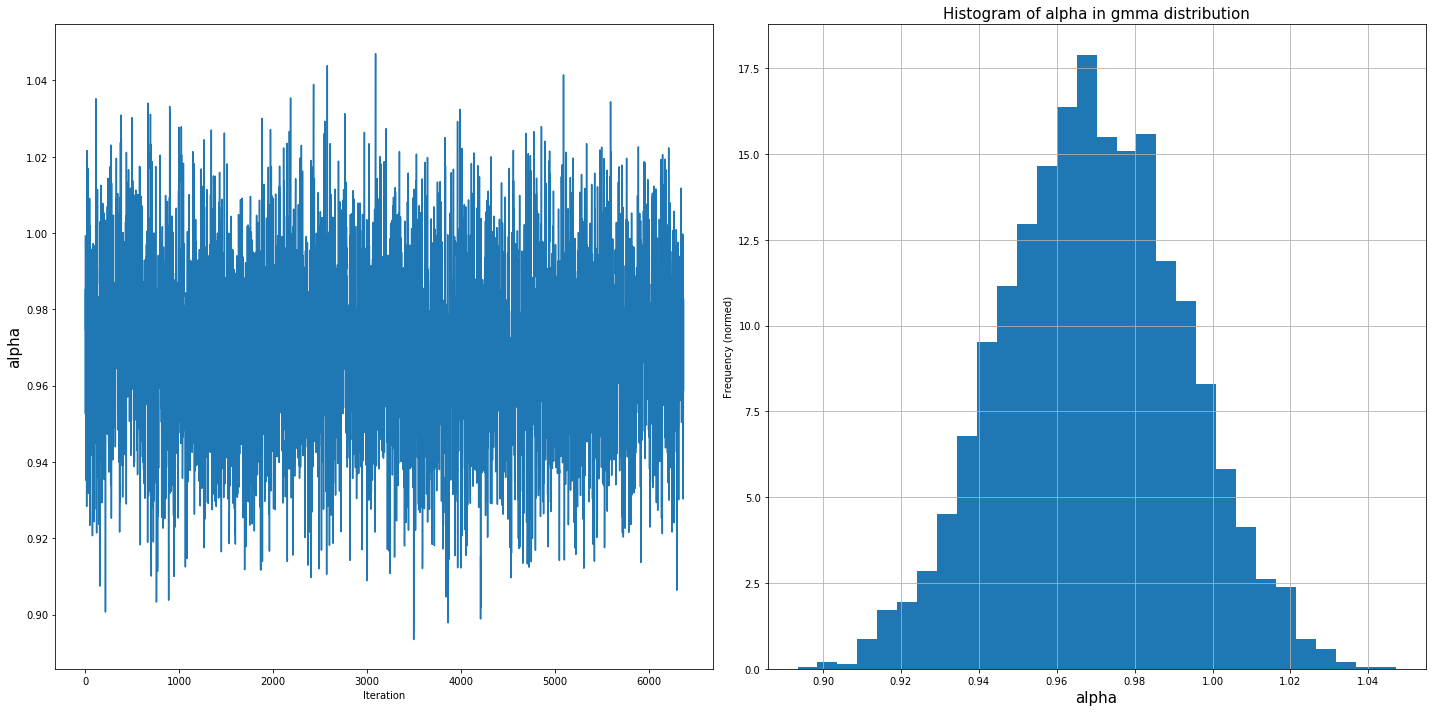

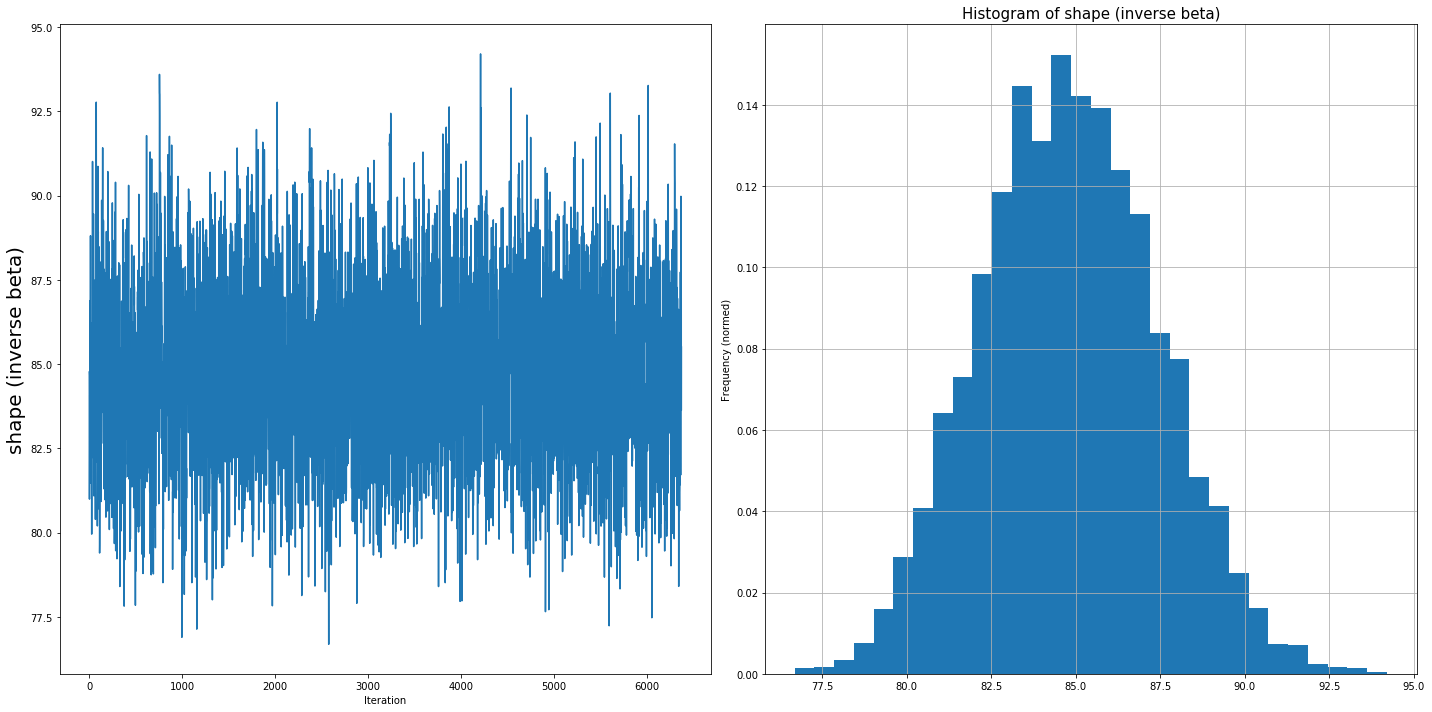

In [210]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_ylabel("alpha", size=15)
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=30,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("alpha", size=15)
ax.set_title("Histogram of alpha in gmma distribution", size =15)

fig.tight_layout()
ax.grid("off")

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_ylabel("shape (inverse beta)", size = 20)
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=30,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_title("Histogram of shape (inverse beta)", size =15)
fig.tight_layout()


ax.grid("off")


Text(0, 0.5, 'scale(inverse of beta)')

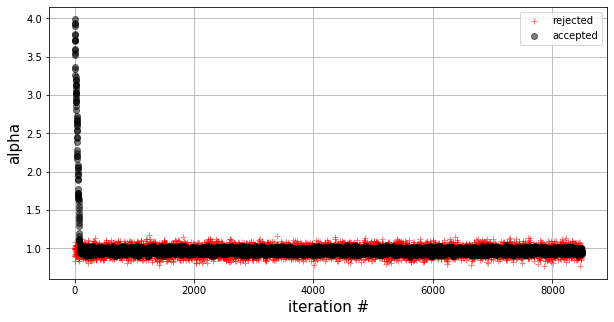

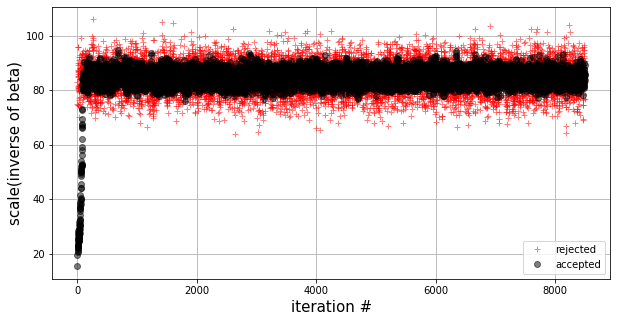

In [191]:
to_show=-accepted.shape[0]
plt.figure(figsize=(10,5))
plt.plot(rejected[to_show:,0], 'r+', label = 'rejected', alpha=0.5)
plt.plot(accepted[to_show:,0], 'ko', label = 'accepted', alpha = 0.5)
plt.legend()
plt.grid()
#plt.xlim([-0.5,-to_show])
plt.xlabel("iteration #", size=15)
plt.ylabel("alpha", size=15)

to_show=-accepted.shape[0]
plt.figure(figsize=(10,5))
plt.plot(rejected[to_show:,1], 'r+', label = 'rejected', alpha=0.5)
plt.plot(accepted[to_show:,1], 'ko', label = 'accepted', alpha = 0.5)
plt.legend()
plt.grid()
#plt.xlim([-0.5,-to_show])
plt.xlabel("iteration #", size=15)
plt.ylabel("scale(inverse of beta)", size=15)

Text(0.5, 1.0, 'MCMC Last 50 samples are shown.')

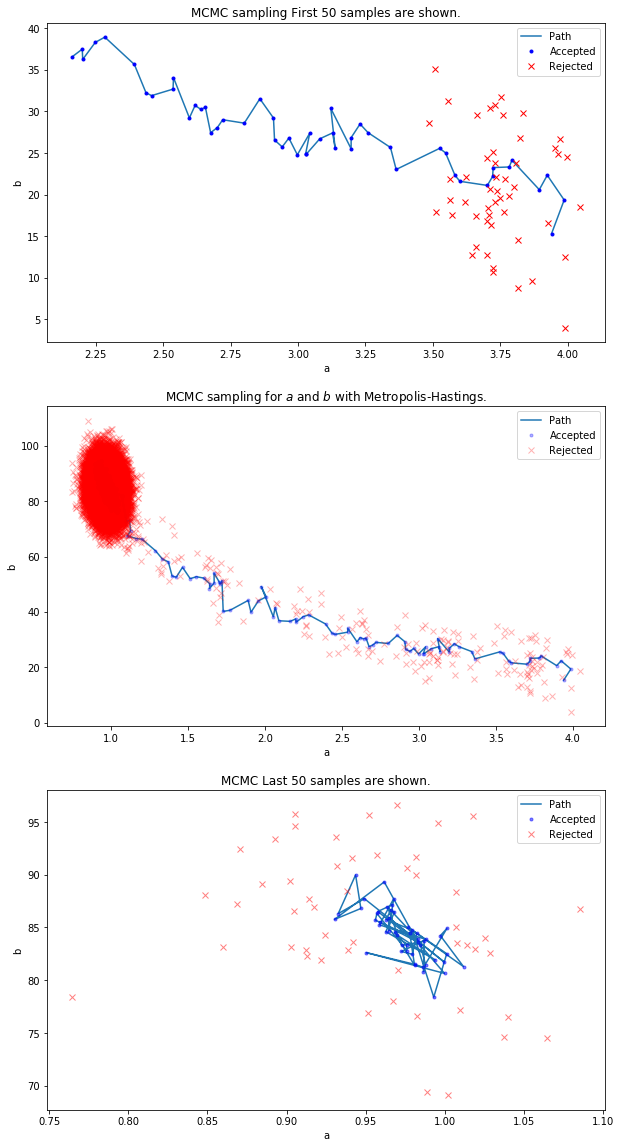

In [227]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("MCMC sampling First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("MCMC sampling for $a$ and $b$ with Metropolis-Hastings.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("MCMC Last 50 samples are shown.")

Text(0, 0.5, 'b')

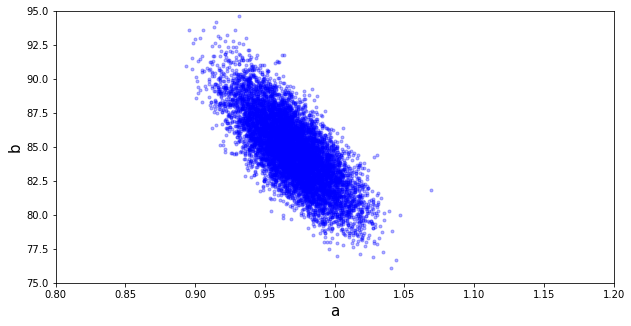

In [223]:
plt.figure(figsize=(10,5))
plt.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
plt.xlim([0.8,1.2])
plt.ylim([75, 95])
plt.xlabel("a", size=15)
plt.ylabel("b", size=15)

Text(0.5, 1.0, 'Joint distribution of $a$ and $b$')

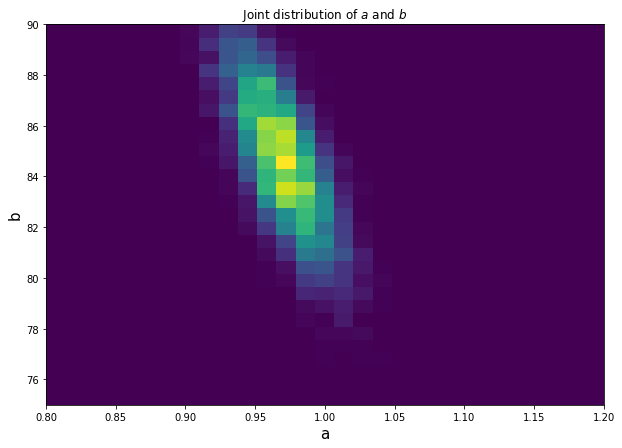

In [214]:
plt.figure(figsize=(10,7))

xbins, ybins = np.linspace(0.8,1.2,30), np.linspace(75,90,30)
counts, xedges, yedges, im = plt.hist2d(accepted[hist_show:,0], accepted[hist_show:,1], density=True, bins=[xbins, ybins])
plt.xlabel("a", size=15)
plt.ylabel("b", size=15)
plt.colorbar(im, ax=ax)
plt.title("Joint distribution of $a$ and $b$")

### wanna compare the original and predicted values

-4247
0.9691545671459294 84.81330838888341


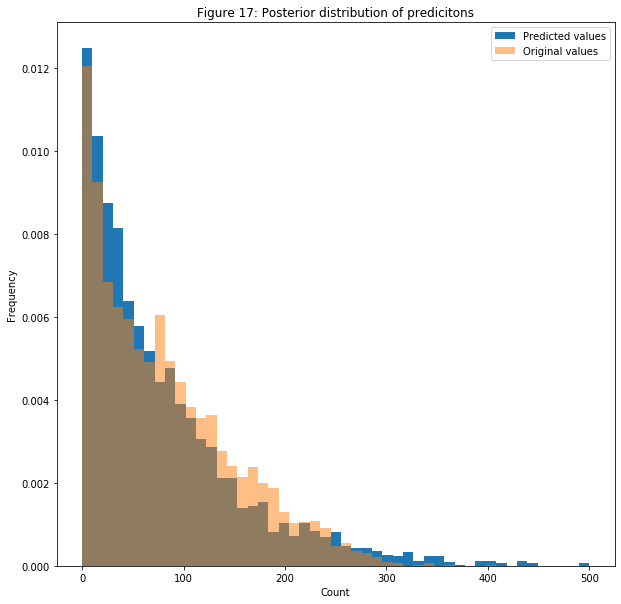

In [225]:
show=-int(0.5*accepted.shape[0])
print(show)

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()

print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)

t=np.arange(activity.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( activity,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 17: Posterior distribution of predicitons")
ax.legend()

In [36]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = np.random.choice(self.pockets)
    def betPocket(self, pockets, amt):
        if str(pockets) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    
    def __str__(self):
        return 'Fair Roulette'

In [39]:
def playRoulette(game, numSpins, pocket, bet):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    #if toPrint:
    print(numSpins, 'spins of', game)
    print('Expected return betting', pocket, '=', \
         str(100*totPocket/numSpins) + '%\n')
    return(totPocket/numSpins)


np.random.seed(0)
game=FairRoulette()

for numSpins in (100,1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1)

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = 1.0232%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.1288%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.4636%

